In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers # Framework for neural nets creating
from keras.layers import Dense, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping
from keras.applications import Xception, VGG19, ResNet50, MobileNet,InceptionResNetV2
from keras.models import Model


import os, shutil # filesystem operations 
from os import listdir
from os.path import isfile, join

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix



import random
#import tensorflow_addons as tfa
#from keras import optimizers
#from keras.utils import image_dataset_from_directory
#%matplotlib inline
#from pathlib import Path

In [14]:
# GPU checking
device_names = tf.test.gpu_device_name()
device_names

''

# Data preparation****

In [15]:
batch_size = 32
#image_size = 256
target_size = (256,256)
input_shape = (256, 256, 3)

In [49]:
#Fetching train data and validation data and processing the data
train_datagen = ImageDataGenerator(rescale = 1.00 / 255.0,shear_range= 0.2,zoom_range=0.2,horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale = 1.00 / 255.0,shear_range= 0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale = 1.00 / 255.0,shear_range= 0.2,zoom_range=0.2,horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
  'train_fruit',
    target_size = target_size,
    batch_size = batch_size

)

validation_generator = val_datagen.flow_from_directory(
    'validation_fruit',
    target_size = target_size,
    batch_size = batch_size
)

test_generator = test_datagen.flow_from_directory(
    'test_fruit',
    target_size = target_size,
    batch_size = batch_size
)

Found 3115 images belonging to 36 classes.
Found 351 images belonging to 36 classes.
Found 359 images belonging to 36 classes.


In [17]:
classes_list = ['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'eggplant', 
                'peas', 'orange', 'pomegranate', 'pear', 'grapes', 'cauliflower', 'raddish', 'pineapple', 
                'lettuce', 'corn', 'soy beans',  'paprika', 'sweetpotato', 'lemon',  'onion', 
                'watermelon', 'potato', 'kiwi', 'ginger', 'chilli pepper', 'jalepeno', 'garlic', 
                'tomato', 'turnip', 'mango', 'sweetcorn', 'spinach', 'cucumber']

In [18]:
model_xception = Xception(weights='imagenet', include_top=False, input_shape=input_shape)
model_mobilenet = MobileNet(weights='imagenet', include_top=False, input_shape=input_shape)
model_xception.trainable = False
model_mobilenet.trainable = False

In [19]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [30]:
def plot_confusion_matrix(cm,
                      classes, 
                      normalized=False, 
                      title=None, 
                      cmap=plt.cm.Blues,
                      size=(16,12)):
    fig, ax = plt.subplots(figsize=size)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

# MobileNet

In [8]:
model_mobilenet.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 128, 128, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 128, 128, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 128, 128, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 128, 128, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 128, 128, 32)     128       
 ation)                                         

In [20]:
# add new classifier layers
flat1 = model_mobilenet.layers[-1].output
flat1 = GlobalAveragePooling2D()(flat1)
class1 = layers.Dense(1024, activation='relu')(flat1)
class1 = layers.Dense(512, activation='relu')(class1)
class1 = layers.Dense(256, activation='relu')(class1)
# class1 = layers.Dense(128, activation='relu')(class1)
# class1 = layers.Dense(64, activation='relu')(class1)
output = layers.Dense(36, activation='sigmoid')(class1)
# define new model
model = Model(inputs=model_mobilenet.inputs, outputs=output)
model.compile(
  loss = "categorical_crossentropy",
  optimizer="adam",
  metrics = ["accuracy"]
)
# summarize
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 128, 128, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 128, 128, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 128, 128, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 128, 128, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 128, 128, 32)     128       
 ation)                                                    

In [22]:
#Training the model with train data and judging this training with validation data
history2 = model.fit(
    train_generator,
    batch_size=batch_size,
    epochs = 20,
    validation_data = validation_generator, 
    callbacks=[es],
    verbose=1)

Epoch 1/20
98/98 [==============================] - 259s 3s/step - loss: 0.0970 - accuracy: 0.9660 - val_loss: 0.2042 - val_accuracy: 0.9487
Epoch 2/20
98/98 [==============================] - 259s 3s/step - loss: 0.0959 - accuracy: 0.9666 - val_loss: 0.1890 - val_accuracy: 0.9516
Epoch 3/20
98/98 [==============================] - 275s 3s/step - loss: 0.0378 - accuracy: 0.9862 - val_loss: 0.1564 - val_accuracy: 0.9630
Epoch 4/20
98/98 [==============================] - 261s 3s/step - loss: 0.0323 - accuracy: 0.9884 - val_loss: 0.2004 - val_accuracy: 0.9544
Epoch 5/20
98/98 [==============================] - 295s 3s/step - loss: 0.0249 - accuracy: 0.9872 - val_loss: 0.1882 - val_accuracy: 0.9544
Epoch 6/20
98/98 [==============================] - 325s 3s/step - loss: 0.0235 - accuracy: 0.9900 - val_loss: 0.1735 - val_accuracy: 0.9601
Epoch 7/20
98/98 [==============================] - 278s 3s/step - loss: 0.0217 - accuracy: 0.9891 - val_loss: 0.1728 - val_accuracy: 0.9601
Epoch 8/20
98

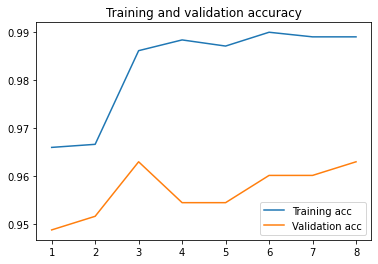

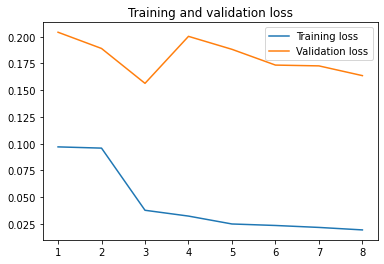

In [25]:
# Plot the train results
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [26]:
test_preds = model.predict(test_generator)
test_pred_labels = np.argmax(test_preds, axis=1)
cm = confusion_matrix(test_generator.classes, test_pred_labels)
cm

12/12 [==============================] - 34s 3s/step


array([[0, 1, 0, ..., 0, 1, 0],
       [2, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 2, 0]], dtype=int64)

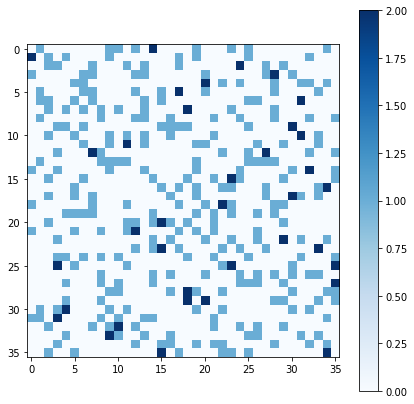

In [31]:
plot_confusion_matrix(cm,
                      classes_list, 
                      normalized=True, 
                      title="Model Performance", 
                      cmap=plt.cm.Blues,
                      size=(7, 7))

In [28]:
result = model.evaluate(test_generator)

12/12 [==============================] - 27s 2s/step - loss: 0.1600 - accuracy: 0.9638


In [44]:
tf.keras.models.save_model(model, 'cnn_model')

INFO:tensorflow:Assets written to: cnn_model\assets


INFO:tensorflow:Assets written to: cnn_model\assets


In [43]:

import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image



test_img = image.load_img('Image_1.jpg', target_size=(256, 256))
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img, axis=0)
result = model.predict(test_img)  # Use the loaded model as a function to make predictions
print(result)

predicted_class_index = np.argmax(result[0])  # Get the index of the class with the highest probability
print(predicted_class_index)
#pred = class_labels[predicted_class_index]  # Get the corresponding class label
print(classes_list[predicted_class_index])

#print("Predicted Class: ", pred)


1/1 [==============================] - 0s 116ms/step
[[9.9642390e-01 5.3789597e-02 4.5324079e-04 2.4665790e-04 1.8584871e-03
  1.5521729e-02 2.0409847e-02 1.6376373e-03 1.2144434e-04 2.2924930e-04
  1.9369979e-04 2.2915179e-05 2.3374851e-06 1.4779915e-04 1.0283520e-05
  4.2543910e-03 9.5804197e-01 9.4728357e-01 7.5800782e-03 9.9973631e-01
  3.9696632e-04 9.9999803e-01 1.0993125e-01 1.6689366e-01 1.4199663e-05
  9.4219714e-01 1.0350905e-02 1.8829844e-03 8.7320611e-02 7.8923088e-03
  1.7007175e-04 1.0720602e-02 5.7746671e-02 4.0670346e-02 4.1898937e-04
  9.9653852e-01]]
21
lemon


# Xception

In [45]:
model_xception.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 127, 127, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 127, 127, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

In [47]:
# add new classifier layers
flat1 = model_xception.layers[-1].output
# Pooling layer
flat1 = keras.layers.GlobalAveragePooling2D()(flat1)
class1 = layers.Dense(1024, activation='relu')(flat1)
class1 = layers.Dense(512, activation='relu')(class1)
class1 = layers.Dense(256, activation='relu')(class1)
# class1 = layers.Dense(128, activation='relu')(class1)
# class1 = layers.Dense(64, activation='relu')(class1)
output = layers.Dense(36, activation='sigmoid')(class1)
# define new model
model = Model(inputs=model_xception.inputs, outputs=output)
model.compile(
  loss = "categorical_crossentropy",
  optimizer="adam",
  metrics = ["accuracy"]
)
# summarize
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 127, 127, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 127, 127, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                           

In [48]:
#Training the model with train data and judging this training with validation data
history3 = model.fit(
    train_generator,
    batch_size=batch_size,
    epochs = 20,
    validation_data = validation_generator, 
    callbacks=[es],
    verbose=1)

c:\Users\abc\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/20
98/98 [==============================] - 747s 8s/step - loss: 1.4200 - accuracy: 0.5852 - val_loss: 0.4889 - val_accuracy: 0.8405
Epoch 2/20
84/98 [========================>.....] - ETA: 1:49 - loss: 0.6195 - accuracy: 0.7912

KeyboardInterrupt: 

In [ ]:
# Plot the train results
acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
test_preds = model.predict(test_generator)
test_pred_labels = np.argmax(test_preds, axis=1)
cm = confusion_matrix(test_generator.classes, test_pred_labels)
cm

In [ ]:
plot_confusion_matrix(cm,
                      classes_list, 
                      normalized=True, 
                      title="Model Performance", 
                      cmap=plt.cm.Blues,
                      size=(7, 7))